In [1]:
import zfit 
import numpy as np
import tensorflow as tf
import scipy.stats
from zfit import z
import random

obs = zfit.Space("x", limits=(0, 10))

mu = zfit.Parameter("mu", 5., step_size=0)
sigma = zfit.Parameter("sigma", 1., step_size=0)

mu1 = zfit.Parameter("mu2", 5., 3, 7)
sigma1 = zfit.Parameter("sigma2", 1., 0.5, 2)

gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs)

gauss1 = zfit.pdf.Gauss(mu=mu1, sigma=sigma1, obs=obs)
# data
n_sample = 1000

data = gauss.create_sampler(n_sample, limits=obs)
data.resample()
data_np = data[:, 0].numpy()
n_sim = 100
data_sim = gauss.create_sampler(n_sim, limits=obs)

/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/util/execution.py:70: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
from scipy.stats import norm
minimizer = zfit.minimize.Minuit()
mean_bias = []
for i in range(0, 49):
    print("Номер прогона" + str(i))
    res = []
    data_sim.resample()
    nll1 = zfit.loss.UnbinnedNLL(model=gauss1, data=data_sim)
    result_sim = minimizer.minimize(nll1) 
    mu_sim = zfit.Parameter("mu_sim" + str(i), round(float(list(result_sim.error().keys())[0]), 3), step_size=0)
    sigma_sim = zfit.Parameter("sigma_sim" + str(i), round(float(list(result_sim.error().keys())[1]), 3), step_size=0)
    gauss_sim = zfit.pdf.Gauss(mu=mu_sim, sigma=sigma_sim, obs=obs)
    for i in range(0, 50):
        data.resample()
        print(i)
        nll2 = zfit.loss.UnbinnedNLL(model=gauss_sim, data=data) 
        result1 = minimizer.minimize(nll2) 
        value_stat = list(result1.error().keys())[0] 
        error_stat = list(result1.error().values())[0] 
        mu_value = float(value_stat.value()) 
        mu_up_error = float(error_stat.upper) 
        mu_low_error = float(error_stat.lower) 
        if(mu_value - 5 > 0): 
            mu_error = mu_up_error 
        else: 
            mu_error = abs(mu_low_error) 
        final_value = (5 - mu_value)/(mu_error) 
        if (abs(final_value) < 20): 
            res.append(final_value) 
    (mu, sigma) = norm.fit(res)
    mean_bias.append(mu)

Номер прогона0
------------------------------------------------------------------
| FCN = 155                     |      Ncalls=32 (32 total)      |
| EDM = 1.58e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:358: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


0
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=35 (35 total)      |
| EDM = 8.21e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=36 (36 total)      |
| EDM = 3.22e-09 (Goal: 0.001)  |            up = 0.5     

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=33 (33 total)      |
| EDM = 1.8e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1445                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total)      |
| EDM = 0.000327 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1473                    |      Ncalls=36 (36 total)      |
| EDM = 7.95e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 5.98e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 total)      |
| EDM = 3.01e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1384                    |      Ncalls=36 (36 total)      |
| EDM = 9.19e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=34 (34 total)      |
| EDM = 7.68e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=28 (28 total)      |
| EDM = 5.7e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1478                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=34 (34 total)      |
| EDM = 2.55e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=30 (30 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=28 (28 total)      |
| EDM = 9.27e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=37 (37 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1369                    |      Ncalls=34 (34 total)      |
| EDM = 4.81e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=36 (36 total)      |
| EDM = 5.11e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=37 (37 total)      |
| EDM = 3.04e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1445                    |      Ncalls=33 (33 total)      |
| EDM = 1.7e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=34 (34 total)      |
| EDM = 5.56e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=36 (36 total)      |
| EDM = 1.48e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total)      |
| EDM = 2.98e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=36 (36 total)      |
| EDM = 8.01e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=28 (28 total)      |
| EDM = 2.83e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=36 (36 total)      |
| EDM = 1.83e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 total)      |
| EDM = 0.000333 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=28 (28 total)      |
| EDM = 7.41e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1502                    |      Ncalls=35 (35 total)      |
| EDM = 3.54e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона5
------------------------------------------------------------------
| FCN = 146.2                   |      Ncall

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 total)      |
| EDM = 1.93e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=28 (28 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1389                    |      Ncalls=34 (34 total)      |
| EDM = 1.26e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=34 (34 total)      |
| EDM = 1.07e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total)      |
| EDM = 4.67e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1445                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 total)      |
| EDM = 6.31e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 total)      |
| EDM = 2.58e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 total)      |
| EDM = 2.58e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1489                    |      Ncalls=34 (34 total)      |
| EDM = 3.39e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=34 (34 total)      |
| EDM = 2e-05 (Goal: 0.001)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1379                    |      Ncalls=36 (36 total)      |
| EDM = 9.53e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=34 (34 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=35 (35 total)      |
| EDM = 7.06e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=28 (28 total)      |
| EDM = 4.43e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=28 (28 total)      |
| EDM = 2.1e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
Номер прогона8
------------------------------------------------------------------
| FCN = 162.3                   |      Ncalls=35 (35 total)      |
| EDM = 2.61e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=28 (28 total)      |
| EDM = 1.58e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1458                    |      Ncalls=37 (37 total)      |
| EDM = 2.09e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 total)      |
| EDM = 5.64e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=28 (28 total)      |
| EDM = 0.000208 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 total)      |
| EDM = 0.000126 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=36 (36 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1462                    |      Ncalls=36 (36 total)      |
| EDM = 1.33e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=28 (28 total)      |
| EDM = 0.000159 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=36 (36 total)      |
| EDM = 4.25e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1465                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 total)      |
| EDM = 0.000133 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 total)      |
| EDM = 2.86e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=36 (36 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=26 (26 total)      |
| EDM = 0.000151 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=36 (36 total)      |
| EDM = 4.94e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=33 (33 total)      |
| EDM = 1.28e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=43 (43 total)      |
| EDM = 1.49e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=33 (33 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=36 (36 total)      |
| EDM = 3.06e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 total)      |
| EDM = 0.000106 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1430                    |      Ncalls=34 (34 total)      |
| EDM = 6.3e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 total)      |
| EDM = 0.000142 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=36 (36 total)      |
| EDM = 9.82e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=36 (36 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=33 (33 total)      |
| EDM = 1.45e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=28 (28 total)      |
| EDM = 6.09e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1454                    |      Ncalls=34 (34 total)      |
| EDM = 9.53e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=33 (33 total)      |
| EDM = 2.17e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=31 (31 total)      |
| EDM = 3.12e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=33 (33 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=28 (28 total)      |
| EDM = 6.27e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=36 (36 total)      |
| EDM = 2.52e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1460                    |      Ncalls=36 (36 total)      |
| EDM = 2.76e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=36 (36 total)      |
| EDM = 5.79e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1464                    |      Ncalls=34 (34 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=33 (33 total)      |
| EDM = 6.53e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=28 (28 total)      |
| EDM = 1.88e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1374                    |      Ncalls=36 (36 total)      |
| EDM = 1.19e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=36 (36 total)      |
| EDM = 1.15e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1468                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 7.52e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=36 (36 total)      |
| EDM = 6.06e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 total)      |
| EDM = 5.37e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1381                    |      Ncalls=36 (36 total)      |
| EDM = 3.92e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1436                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=34 (34 total)      |
| EDM = 8.19e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона16
------------------------------------------------------------------
| FCN = 144.8                   |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 3.07e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=28 (28 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 total)      |
| EDM = 4.24e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=34 (34 total)      |
| EDM = 2.42e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=37 (37 total)      |
| EDM = 4.49e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=28 (28 total)      |
| EDM = 8.87e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=33 (33 total)      |
| EDM = 1.25e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1462                    |      Ncalls=28 (28 total)      |
| EDM = 0.000183 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 total)      |
| EDM = 4.12e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1370                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=28 (28 total)      |
| EDM = 2.85e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1463                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 total)      |
| EDM = 1.59e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=28 (28 total)      |
| EDM = 0.000251 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 total)      |
| EDM = 1.12e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=36 (36 total)      |
| EDM = 2.79e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
Номер прогона19
------------------------------------------------------------------
| FCN = 143.7                   |      Ncalls=32 (32 total)      |
| EDM = 6.55e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1412                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=28 (28 total)      |
| EDM = 4.33e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=37 (37 total)      |
| EDM = 8.49e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1373                    |      Ncalls=37 (37 total)      |
| EDM = 1.11e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=28 (28 total)      |
| EDM = 2.8e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1370                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=36 (36 total)      |
| EDM = 3.29e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=35 (35 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=28 (28 total)      |
| EDM = 2.57e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1385                    |      Ncalls=36 (36 total)      |
| EDM = 1.44e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total)      |
| EDM = 1.67e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 total)      |
| EDM = 0.000196 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 total)      |
| EDM = 0.000111 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=28 (28 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=35 (35 total)      |
| EDM = 4.21e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=34 (34 total)      |
| EDM = 7.18e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=28 (28 total)      |
| EDM = 2.37e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1454                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 total)      |
| EDM = 2.55e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1385                    |      Ncalls=36 (36 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=33 (33 total)      |
| EDM = 1.48e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=28 (28 total)      |
| EDM = 5.39e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=33 (33 total)      |
| EDM = 2.12e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=28 (28 total)      |
| EDM = 0.000354 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=36 (36 total)      |
| EDM = 2.26e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=36 (36 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=37 (37 total)      |
| EDM = 2.09e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=28 (28 total)      |
| EDM = 1.74e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=33 (33 total)      |
| EDM = 2.05e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=28 (28 total)      |
| EDM = 2.05e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=40 (40 total)      |
| EDM = 5.62e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=36 (36 total)      |
| EDM = 1.3e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total)      |
| EDM = 6.65e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=33 (33 total)      |
| EDM = 2.2e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=28 (28 total)      |
| EDM = 1.67e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=36 (36 total)      |
| EDM = 2.8e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1448                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 total)      |
| EDM = 4.91e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=37 (37 total)      |
| EDM = 1.15e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1375                    |      Ncalls=36 (36 total)      |
| EDM = 1.06e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=36 (36 total)      |
| EDM = 9.97e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=34 (34 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=36 (36 total)      |
| EDM = 1.42e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=36 (36 total)      |
| EDM = 1.17e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=33 (33 total)      |
| EDM = 7.39e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=36 (36 total)      |
| EDM = 6.02e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона27
------------------------------------------------------------------
| FCN = 145.9                   |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=36 (36 total)      |
| EDM = 1.05e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=28 (28 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=28 (28 total)      |
| EDM = 2.37e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=28 (28 total)      |
| EDM = 9.73e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 total)      |
| EDM = 6.87e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=28 (28 total)      |
| EDM = 0.000241 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=34 (34 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=36 (36 total)      |
| EDM = 7.27e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1458                    |      Ncalls=36 (36 total)      |
| EDM = 2.27e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=28 (28 total)      |
| EDM = 0.000158 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1376                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=37 (37 total)      |
| EDM = 1.24e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1408                    |      Ncalls=36 (36 total)      |
| EDM = 1.48e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=33 (33 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1373                    |      Ncalls=36 (36 total)      |
| EDM = 6.83e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=33 (33 total)      |
| EDM = 1.6e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=33 (33 total)      |
| EDM = 5.82e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1434                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
Номер прогона30
------------------------------------------------------------------
| FCN = 147.2                   |      Ncalls=31 (31 total)      |
| EDM = 6.19e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1422                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=28 (28 total)      |
| EDM = 0.000299 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=31 (31 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=33 (33 total)      |
| EDM = 7.9e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1394                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1364                    |      Ncalls=36 (36 total)      |
| EDM = 3.13e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=36 (36 total)      |
| EDM = 4.98e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 total)      |
| EDM = 0.000294 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=36 (36 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=36 (36 total)      |
| EDM = 9.4e-08 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=33 (33 total)      |
| EDM = 3.03e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=33 (33 total)      |
| EDM = 8.12e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=37 (37 total)      |
| EDM = 1.18e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=37 (37 total)      |
| EDM = 1.93e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1457                    |      Ncalls=36 (36 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=37 (37 total)      |
| EDM = 1.65e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total)      |
| EDM = 2.18e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1446                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=34 (34 total)      |
| EDM = 8.09e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=35 (35 total)      |
| EDM = 0.000497 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=28 (28 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1352                    |      Ncalls=36 (36 total)      |
| EDM = 2.28e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1405                    |      Ncalls=28 (28 total)      |
| EDM = 1.41e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1361                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 total)      |
| EDM = 3.6e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=31 (31 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 total)      |
| EDM = 0.000336 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=35 (35 total)      |
| EDM = 2.78e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=36 (36 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1400                    |      Ncalls=28 (28 total)      |
| EDM = 1.87e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1417                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 total)      |
| EDM = 0.000162 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1421                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1404                    |      Ncalls=34 (34 total)      |
| EDM = 4.54e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1454                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1373                    |      Ncalls=28 (28 total)      |
| EDM = 9.16e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1378                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 total)      |
| EDM = 2.3e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=33 (33 total)      |
| EDM = 1.45e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=36 (36 total)      |
| EDM = 7.13e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 total)      |
| EDM = 1.48e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1443                    |      Ncalls=34 (34 total)      |
| EDM = 3.79e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=36 (36 total)      |
| EDM = 8.9e-07 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=28 (28 total)      |
| EDM = 6.78e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1449                    |      Ncalls=28 (28 total)      |
| EDM = 3.82e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1412                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=34 (34 total)      |
| EDM = 1.38e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1380                    |      Ncalls=36 (36 total)      |
| EDM = 3.87e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=36 (36 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=33 (33 total)      |
| EDM = 6e-07 (Goal: 0.001)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1461                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 total)      |
| EDM = 8.33e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1432                    |      Ncalls=34 (34 total)      |
| EDM = 1.63e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1442                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1460                    |      Ncalls=28 (28 total)      |
| EDM = 7.86e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Номер прогона38
------------------------------------------------------------------
| FCN = 145.9                   |      Ncal

------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1410                    |      Ncalls=28 (28 total)      |
| EDM = 0.000226 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 tota

------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1401                    |      Ncalls=28 (28 total)      |
| EDM = 2.29e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=28 (28 total)      |
| EDM = 4.99e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1451                    |      Ncalls=33 (33 total)      |
| EDM = 9.7e-06 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=34 (34 total)      |
| EDM = 2.63e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1440                    |      Ncalls=34 (34 total

------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1455                    |      Ncalls=34 (34 total)      |
| EDM = 3.57e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1459                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=28 (28 total)      |
| EDM = 0.000229 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=28 (28 total)      |
| EDM = 2.47e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1387                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=28 (28 total)      |
| EDM = 2.34e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1411                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1385                    |      Ncalls=35 (35 total)      |
| EDM = 1.34e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1431                    |      Ncalls=34 (34 total

------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=35 (35 total)      |
| EDM = 5.77e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=28 (28 total)      |
| EDM = 0.000122 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1407                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1419                    |      Ncalls=36 (36 total)      |
| EDM = 2.07e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1390                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
Номер прогона41
------------------------------------------------------------------
| FCN = 147.9                   |      Ncalls=30 (30 total)      |
| EDM = 2.79e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1383                    |      Ncall

------------------------------------------------------------------
10
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=34 (34 total)      |
| EDM = 1.24e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1453                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
21
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 total)      |
| EDM = 0.000152 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
32
------------------------------------------------------------------
| FCN = 1397                    |      Ncalls=36 (36 total)      |
| EDM = 1.04e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1414                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
43
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=36 (36 total)      |
| EDM = 1.18e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
3
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 total)      |
| EDM = 2.28e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1461                    |      Ncalls=34 (34 total

------------------------------------------------------------------
14
------------------------------------------------------------------
| FCN = 1464                    |      Ncalls=34 (34 total)      |
| EDM = 3.09e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
25
------------------------------------------------------------------
| FCN = 1392                    |      Ncalls=36 (36 total)      |
| EDM = 3.2e-09 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
36
------------------------------------------------------------------
| FCN = 1439                    |      Ncalls=28 (28 total)      |
| EDM = 9.41e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=37 (37 tot

------------------------------------------------------------------
47
------------------------------------------------------------------
| FCN = 1369                    |      Ncalls=37 (37 total)      |
| EDM = 8.78e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
7
------------------------------------------------------------------
| FCN = 1422                    |      Ncalls=36 (36 total)      |
| EDM = 1.16e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1380                    |      Ncalls=37 (37 total

------------------------------------------------------------------
18
------------------------------------------------------------------
| FCN = 1391                    |      Ncalls=36 (36 total)      |
| EDM = 7.39e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1378                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
29
------------------------------------------------------------------
| FCN = 1395                    |      Ncalls=36 (36 total)      |
| EDM = 1.01e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1441                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
40
------------------------------------------------------------------
| FCN = 1388                    |      Ncalls=36 (36 total)      |
| EDM = 7.04e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1359                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
0
------------------------------------------------------------------
| FCN = 1429                    |      Ncalls=37 (37 total)      |
| EDM = 1.17e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1383                    |      Ncalls=37 (37 total

------------------------------------------------------------------
11
------------------------------------------------------------------
| FCN = 1471                    |      Ncalls=34 (34 total)      |
| EDM = 1.68e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
22
------------------------------------------------------------------
| FCN = 1409                    |      Ncalls=33 (33 total)      |
| EDM = 1.3e-05 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
33
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 total)      |
| EDM = 5.66e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1472                    |      Ncalls=34 (34 tot

------------------------------------------------------------------
44
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=36 (36 total)      |
| EDM = 2.64e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
4
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=36 (36 total)      |
| EDM = 1.44e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1424                    |      Ncalls=28 (28 total

------------------------------------------------------------------
15
------------------------------------------------------------------
| FCN = 1450                    |      Ncalls=28 (28 total)      |
| EDM = 0.000126 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
26
------------------------------------------------------------------
| FCN = 1437                    |      Ncalls=28 (28 total)      |
| EDM = 0.000173 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
37
------------------------------------------------------------------
| FCN = 1398                    |      Ncalls=34 (34 total)      |
| EDM = 4.02e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
48
------------------------------------------------------------------
| FCN = 1402                    |      Ncalls=35 (35 total)      |
| EDM = 3.36e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1435                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
8
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=28 (28 total)      |
| EDM = 0.000216 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
9
------------------------------------------------------------------
| FCN = 1428                    |      Ncalls=36 (36 total

------------------------------------------------------------------
19
------------------------------------------------------------------
| FCN = 1399                    |      Ncalls=37 (37 total)      |
| EDM = 1.58e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
20
------------------------------------------------------------------
| FCN = 1403                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
30
------------------------------------------------------------------
| FCN = 1444                    |      Ncalls=36 (36 total)      |
| EDM = 3.07e-09 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
31
------------------------------------------------------------------
| FCN = 1373                    |      Ncalls=35 (35 tot

------------------------------------------------------------------
41
------------------------------------------------------------------
| FCN = 1427                    |      Ncalls=36 (36 total)      |
| EDM = 1.46e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
42
------------------------------------------------------------------
| FCN = 1433                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
1
------------------------------------------------------------------
| FCN = 1416                    |      Ncalls=36 (36 total)      |
| EDM = 2.43e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
2
------------------------------------------------------------------
| FCN = 1415                    |      Ncalls=33 (33 total

------------------------------------------------------------------
12
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=28 (28 total)      |
| EDM = 2.08e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
13
------------------------------------------------------------------
| FCN = 1425                    |      Ncalls=33 (33 tot

------------------------------------------------------------------
23
------------------------------------------------------------------
| FCN = 1438                    |      Ncalls=34 (34 total)      |
| EDM = 6.58e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
24
------------------------------------------------------------------
| FCN = 1452                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
34
------------------------------------------------------------------
| FCN = 1396                    |      Ncalls=34 (34 total)      |
| EDM = 1.93e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
35
------------------------------------------------------------------
| FCN = 1393                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
45
------------------------------------------------------------------
| FCN = 1386                    |      Ncalls=36 (36 total)      |
| EDM = 1.48e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
46
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
5
------------------------------------------------------------------
| FCN = 1447                    |      Ncalls=28 (28 total)      |
| EDM = 2.42e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
6
------------------------------------------------------------------
| FCN = 1356                    |      Ncalls=35 (35 total

------------------------------------------------------------------
16
------------------------------------------------------------------
| FCN = 1413                    |      Ncalls=28 (28 total)      |
| EDM = 0.000119 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
17
------------------------------------------------------------------
| FCN = 1423                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
27
------------------------------------------------------------------
| FCN = 1426                    |      Ncalls=36 (36 total)      |
| EDM = 7.98e-08 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
28
------------------------------------------------------------------
| FCN = 1418                    |      Ncalls=28 (28 tot

------------------------------------------------------------------
38
------------------------------------------------------------------
| FCN = 1382                    |      Ncalls=37 (37 total)      |
| EDM = 1.59e-07 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
39
------------------------------------------------------------------
| FCN = 1406                    |      Ncalls=36 (36 tot

------------------------------------------------------------------
49
------------------------------------------------------------------
| FCN = 1378                    |      Ncalls=37 (37 total)      |
| EDM = 8.11e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


(array([2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 1., 1., 0., 0., 3.,
        1., 2., 3., 2., 2., 4., 3., 0., 2., 1., 0., 1., 0., 0., 2., 1., 5.,
        3., 1., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 1., 1.]),
 array([-0.24916225, -0.2377952 , -0.22642814, -0.21506108, -0.20369403,
        -0.19232697, -0.18095992, -0.16959286, -0.1582258 , -0.14685875,
        -0.13549169, -0.12412463, -0.11275758, -0.10139052, -0.09002346,
        -0.07865641, -0.06728935, -0.05592229, -0.04455524, -0.03318818,
        -0.02182112, -0.01045407,  0.00091299,  0.01228005,  0.0236471 ,
         0.03501416,  0.04638122,  0.05774827,  0.06911533,  0.08048239,
         0.09184944,  0.1032165 ,  0.11458356,  0.12595061,  0.13731767,
         0.14868473,  0.16005178,  0.17141884,  0.18278589,  0.19415295,
         0.20552001,  0.21688706,  0.22825412,  0.23962118,  0.25098823,
         0.26235529,  0.27372235,  0.2850894 ,  0.29645646,  0.30782352,
         0.31919057]),
 <a list of 1 Patch o

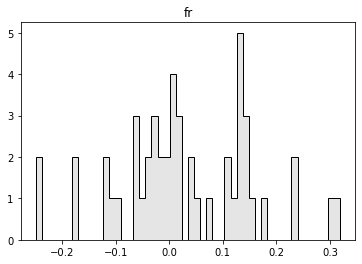

In [3]:
import matplotlib.pyplot as plt 
color = 'black' 
plt.figure() 
plt.title("fr") 
# plot the data 
n, bins, patches = plt.hist(mean_bias, color=color, bins=50, histtype="stepfilled", alpha=0.1) 
plt.hist(mean_bias, color=color, bins=50, histtype="step")

Text(-0.2, 4, 'sigma= 0.125')

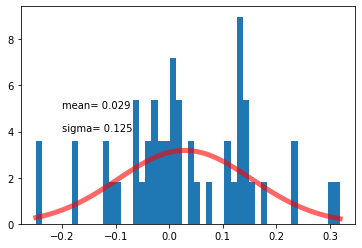

In [6]:
from scipy.stats import norm
(mu, sigma) = norm.fit(mean_bias) 

pdf_x = np.linspace(np.min(mean_bias),np.max(mean_bias),50)
n, bins, patches = plt.hist(mean_bias, bins = 50, density=True,)
plt.plot(pdf_x, norm.pdf(pdf_x, loc = mu, scale = sigma ), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.text(-0.2, 5, "mean= " + str(round(mu, 3)))
plt.text(-0.2, 4, "sigma= " + str(round(sigma, 3)))

In [8]:
import pickle
f = open('sim10.bin', 'wb')
pickle.dump(mean_bias, f)
f.close()
